## YOLOv5 기본설정

In [ ]:
%%time
# 약 30초 소요
# 디렉토리 및 파일 구조를 트리 형식으로 보여주는 패키지 설치
!sudo apt-get install tree -qq > /dev/null

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
CPU times: user 16.8 ms, sys: 6.49 ms, total: 23.3 ms
Wall time: 4.93 s


In [ ]:
%%time
# 약 7분 소요
# 학습속도를 높이기 위한 Apex by NVIDIA 설치(optional)
!git clone https://github.com/NVIDIA/apex && cd apex && pip install -v \
  --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" . --user && cd .. && rm -rf apex

Cloning into 'apex'...
remote: Enumerating objects: 7910, done.
remote: Total 7910 (delta 0), reused 0 (delta 0), pack-reused 7910
Receiving objects: 100% (7910/7910), 13.99 MiB | 29.35 MiB/s, done.
Resolving deltas: 100% (5398/5398), done.
/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-1a4c2gmu
Created temporary directory: /tmp/pip-req-tracker-p154v0p2
Created requirements tracker '/tmp/pip-req-tracker-p154v0p2'
Created temporary directory: /tmp/pip-install-9zhpglsj
Processing /content/apex
  Created temporary directory: /tmp/pip-req-build-wweyq6_b
  Added file:///content/apex to build tracker '/tmp/pip-req-tracker-p154v0p2'
    Running setup.py (path:/tmp/pip-req-build-wweyq6_b/setup.py) egg_info for package from file:///content/apex
   

In [ ]:
# YOLOv5를 학습시키기 위한 관련 라이브러리 다운로드
!pip install torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install numpy==1.17
!pip install PyYAML==5.3.1
!pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4MB 24kB/s 
     |████████████████████████████████| 6.7MB 14.2MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.5.1+cu101 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101
  Found existing installation: torchvision 0.9.0+cu101
    Uninstalling torchvision-0.9.0+cu101:
      Successfully uninstalled torchvision-0.9.0+cu101
     |████████████████████████████████| 20.3MB 160kB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.5.1+cu101 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.17.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirem

     |████████████████████████████████| 276kB 21.1MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=4fd1892eac99b1060357e7ac6a3d4234dc1738ad68d90405bb4ed86ed183970e
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-za9b54h8
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-za9b54h8
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=265068 sha256=d5061fe35670dab7deef9362e73ce52b54092180e9dcb0656c7a2cda83dad760
  Stored in directory: /tmp/pip-ephem-wheel-cache-7838uuv3/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing inst

In [ ]:
# YOLOv5 다운로드 및 경로 설정
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
# 코드의 재현성을 보장하기 위해 github의 특정 commit을 checkout
!git checkout ec72eea62bf5bb86b0272f2e65e413957533507f

Cloning into 'yolov5'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 5302 (delta 49), reused 55 (delta 27), pack-reused 5223
Receiving objects: 100% (5302/5302), 8.02 MiB | 8.24 MiB/s, done.
Resolving deltas: 100% (3618/3618), done.
/content/yolov5
Note: checking out 'ec72eea62bf5bb86b0272f2e65e413957533507f'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at ec72eea Merge remote-tracking branch 'origin/master'


## 데이터 탐색

### 데이터셋 다운로드

In [ ]:
# 데이터 제어 파일(json, yaml) 다운로드
!git clone https://github.com/Halinee/YOLOv5.git

Cloning into 'YOLOv5'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 16 (delta 2), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.


In [ ]:
# Github에서 다운로드 받은 파일 위치를 기존 코드에 맞추기 위한 경로 수정
!mv YOLOv5/clothing.yaml data/
!mv YOLOv5/yolov5x.yaml models/
!mv YOLOv5/clothing.json /content/yolov5/

### 라이브러리

In [ ]:
from pathlib import Path
from tqdm import tqdm
import numpy as np
import json
import urllib
import PIL.Image as Image
import cv2
import torch
import torchvision
from IPython.display import display
from sklearn.model_selection import train_test_split

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 16, 10

np.random.seed(42)

### 데이터 예시

본 예제의 메타데이터는 json 파일로 저장되어 있음.

여기서 메타데이터에 해당하는 데이터는 아래와 같음.

- 이미지 크기
- 이미지 레이블
- 추가 정보
- 바운딩 박스 포인트(0 ~ 1 사이의 값으로 정규화)
- 이미지 파일 url

In [ ]:
# 하나의 라인에 하나의 이미지 매핑
clothing = []
with open("clothing.json") as f:
    for line in f:
        clothing.append(json.loads(line))

In [ ]:
clothing[0]

{'annotation': [{'imageHeight': 312,
   'imageWidth': 147,
   'label': ['Tops'],
   'notes': '',
   'points': [{'x': 0.02040816326530612, 'y': 0.2532051282051282},
    {'x': 0.9931972789115646, 'y': 0.8108974358974359}]}],
 'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb063ad2b650163b00a1ead0017/4bb8fd9d-8d52-46c7-aa2a-9c18af10aed6___Data_xxl-top-4437-jolliy-original-imaekasxahykhd3t.jpeg',
 'extras': None}

In [ ]:
# 하나의 이미지에 두 개의 레이블이 존재하는 이미지
for c in clothing:
  if len(c['annotation']) > 1:
    display(c)

{'annotation': [{'imageHeight': 312,
   'imageWidth': 265,
   'label': ['Jackets'],
   'notes': '',
   'points': [{'x': 0, 'y': 0.6185897435897436},
    {'x': 0.026415094339622643, 'y': 0.6185897435897436}]},
  {'imageHeight': 312,
   'imageWidth': 265,
   'label': ['Skirts'],
   'notes': '',
   'points': [{'x': 0.01509433962264151, 'y': 0.03205128205128205},
    {'x': 1, 'y': 0.9839743589743589}]}],
 'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb063ad2b650163b00a1ead0017/b3be330c-c211-45bb-b244-11aef08021c8___Data_free-sk-5108-mudrika-original-imaf4fz626pegq9f.jpeg',
 'extras': None}

In [ ]:
# 전체 카테고리
categories = []
for c in clothing:
  for a in c['annotation']:
    categories.extend(a['label'])
categories = list(set(categories))
categories.sort()
categories

['Jackets',
 'Jeans',
 'Shirts',
 'Shoes',
 'Skirts',
 'Tops',
 'Trousers',
 'Tshirts',
 'sunglasses']

In [ ]:
# 데이터 분할
train_clothing, val_clothing = train_test_split(clothing, test_size=0.1)
len(train_clothing), len(val_clothing)

(453, 51)

### 샘플 이미지 확인

In [ ]:
# train_clothing의 배열 인덱스를 임의로 조정
row = train_clothing[10]

img = urllib.request.urlopen(row["content"])
img = Image.open(img)
img = img.convert('RGB')

img.save("demo_image.jpeg", "JPEG")

In [ ]:
row

{'annotation': [{'imageHeight': 312,
   'imageWidth': 145,
   'label': ['Tops'],
   'notes': '',
   'points': [{'x': 0.013793103448275862, 'y': 0.22756410256410256},
    {'x': 1, 'y': 0.7948717948717948}]}],
 'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb063ad2b650163b00a1ead0017/ec339ad6-6b73-406a-8971-f7ea35d47577___Data_s-top-203-red-srw-original-imaf2nfrxdzvhh3k.jpeg',
 'extras': None}

In [ ]:
# OpenCV를 이용하여 이미지 읽기
img = cv2.cvtColor(cv2.imread(f'demo_image.jpeg'), cv2.COLOR_BGR2RGB)
img.shape

(312, 145, 3)

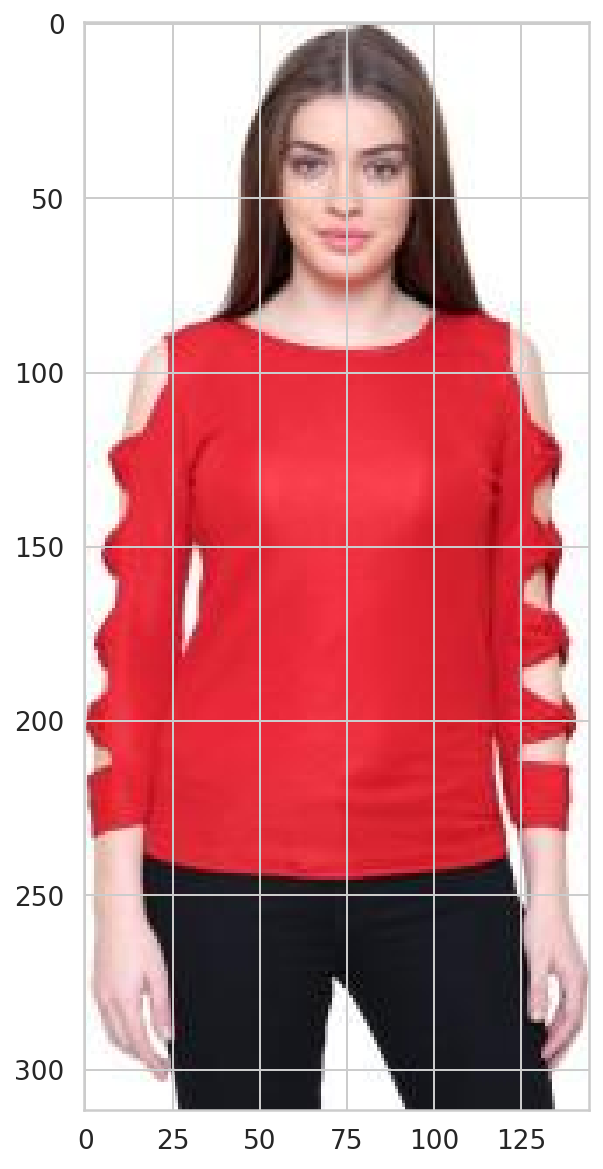

In [ ]:
plt.imshow(img)

In [ ]:
# row의 주석 정보를 사용하여 OpenCV로 이미지에 바운딩 박스 그리기
for a in row['annotation']:
  for label in a['label']:

    w = a['imageWidth']
    h = a['imageHeight']
    points = a['points']
    p1, p2 = points
    x1, y1 = p1['x'] * w, p1['y'] * h
    x2, y2 = p2['x'] * w, p2['y'] * h

    cv2.rectangle(
      img,
      (int(x1), int(y1)),
      (int(x2), int(y2)),
      color=(0, 255, 0),
      thickness=2
    )

    ((label_width, label_height), _) = cv2.getTextSize(
        label, 
        fontFace=cv2.FONT_HERSHEY_PLAIN,
        fontScale=1.75, 
        thickness=2
    )

    cv2.rectangle(
      img,
      (int(x1), int(y1)),
      (int(x1 + label_width + label_width * 0.05), int(y1 + label_height + label_height * 0.25)),
      color=(0, 255, 0),
      thickness=cv2.FILLED
    )

    cv2.putText(
      img,
      label,
      org=(int(x1), int(y1 + label_height + label_height * 0.25)), # bottom left
      fontFace=cv2.FONT_HERSHEY_PLAIN,
      fontScale=1.75,
      color=(255, 255, 255),
      thickness=2
    )

(-0.5, 144.5, 311.5, -0.5)

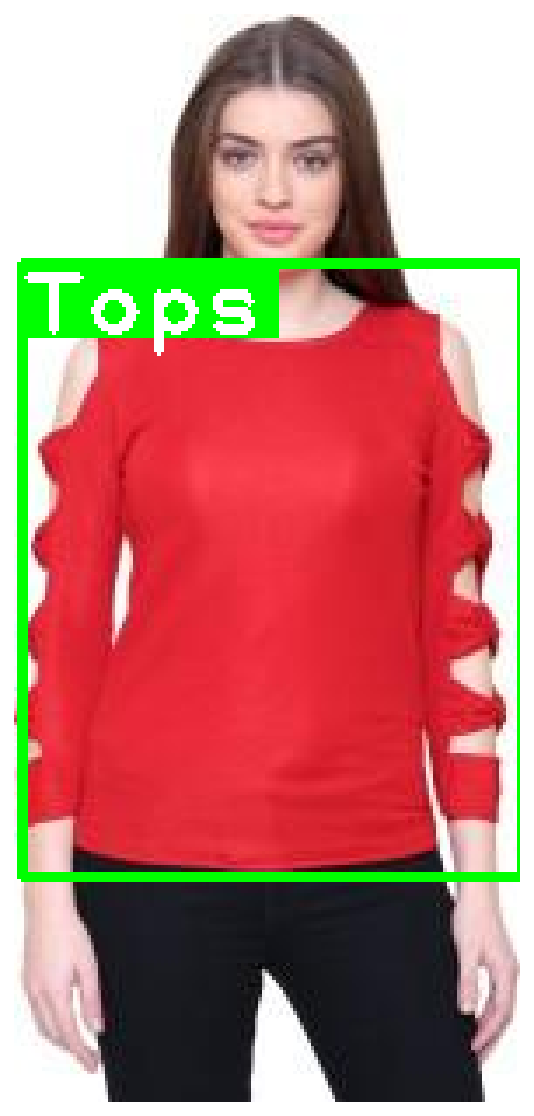

In [ ]:
plt.imshow(img)
plt.axis('off')

## YOLOv5 데이터셋 생성

YOLOv5는 데이터 폴더 구조가 아래와 같이 정의되어 있음.

- 전체 데이터 폴더
  - 이미지 데이터 폴더
    - train 이미지 데이터 폴더
    - val 이미지 데이터 폴더
  - 텍스트 레이블 폴더
    - train 텍스트 레이블 폴더
    - val 텍스트 레이블 폴더

또한 데이터 형식은 다음과 같이 정의되어 있음.

- 하나의 이미지에 하나의 텍스트 레이블이 존재
- 하나의 행에 하나의 객체가 존재
- 각 행은 다음의 정보 포함 : 클래스 인덱스, 바운딩 박스 x축 중심, 바운딩 박스 y축 중심, 이미지 크기
- 바운딩 박스에 대한 좌표 정보는 0 ~ 1 사이의 값으로 정규화되어 있어야 함

따라서, 위의 정보를 충족하는 데이터셋을 생성해야 함.

In [ ]:
def create_dataset(clothing, categories, dataset_type):
  # 이미지 및 레이블 파일 저장 경로
  images_path = Path(f"clothing/images/{dataset_type}")
  images_path.mkdir(parents=True, exist_ok=True)
  labels_path = Path(f"clothing/labels/{dataset_type}")
  labels_path.mkdir(parents=True, exist_ok=True)

  for img_id, row in enumerate(tqdm(clothing)):
    # 이미지 포맷을 설정하고 저장
    image_name = f"{img_id}.jpeg"
    img = urllib.request.urlopen(row["content"])
    img = Image.open(img)
    img = img.convert("RGB")
    img.save(str(images_path / image_name), "JPEG")

    # 바운딩 박스 좌표 정보를 기반으로 이미지 크기 및 중심점을 계산하고 저장
    label_name = f"{img_id}.txt"
    with (labels_path / label_name).open(mode="w") as label_file:
      for a in row['annotation']:
        for label in a['label']:
          category_idx = categories.index(label)
          points = a['points']
          p1, p2 = points
          x1, y1 = p1['x'], p1['y']
          x2, y2 = p2['x'], p2['y']
          bbox_width = x2 - x1
          bbox_height = y2 - y1


          label_file.write(
            f"{category_idx} {x1 + bbox_width / 2} {y1 + bbox_height / 2} {bbox_width} {bbox_height}\n")

In [ ]:
create_dataset(train_clothing, categories, 'train')
create_dataset(val_clothing, categories, 'val')

100%|██████████| 51/51 [00:02<00:00, 19.92it/s]


In [ ]:
# 생성된 데이터셋 폴더 구조 확인
!tree clothing -L 2

clothing
├── images
│   ├── train
│   └── val
└── labels
    ├── train
    └── val

6 directories, 0 files


In [ ]:
# 샘플 레이블링 정보 확인
!cat clothing/labels/train/0.txt

4 0.525462962962963 0.5432692307692308 0.9027777777777778 0.9006410256410257


In [ ]:
# clothing.yaml 파일의 설정에 맞게 파일 경로 수정
!mv clothing /content/

## Fine Tuning

모델 학습 파라미터 설정
- img : 데이터셋 내 이미지를 설정 수치(640)로 재설정
- batch : 배치 크기(4)
- epochs : 학습 반복 횟수(30)
- data : 데이터셋 구성 yaml 파일 경로
- cfg : 모델 구성 yaml파일 경로
- weights : 사전학습 모델 YOLOv5x을 초기 가중치로 사용
- name : 모델명 지정
- cache : 학습속도 향상을 위한 데이터셋 이미지 캐시

In [ ]:
%%time
!python train.py --img 640 --batch 4 --epochs 30 \
  --data data/clothing.yaml --cfg models/yolov5x.yaml --name yolov5x_clothing_detect --cache

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Namespace(adam=False, batch_size=4, bucket='', cache_images=True, cfg='models/yolov5x.yaml', data='data/clothing.yaml', device='', epochs=30, evolve=False, img_size=[640], multi_scale=False, name='yolov5x_clothing_detect', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

2021-03-12 00:00:02.556978: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:60

## 성능 평가

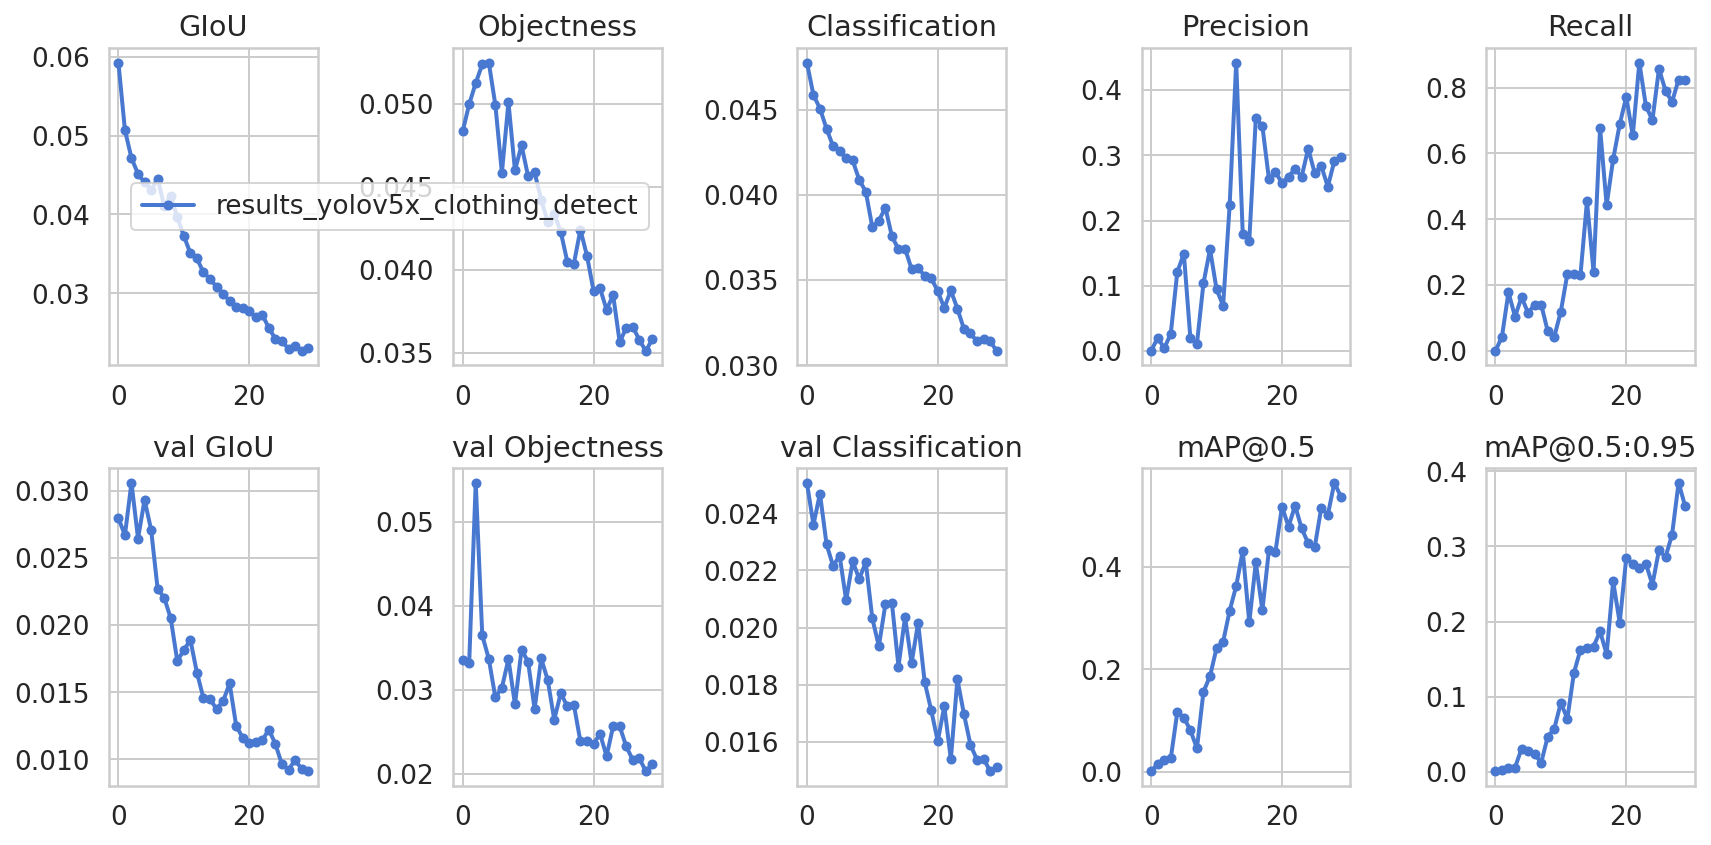

In [ ]:
from utils.utils import plot_results

plot_results();

In [ ]:
# 검증 데이터 셋으로부터 50개의 이미지를 추출하여 학습시킨 YOLOv5 모델의 성능 평가
!find ../clothing/images/val/ -maxdepth 1 -type f | head -50 | xargs cp -t "inference/images/"

In [ ]:
!python detect.py --weights weights/best_yolov5x_clothing_detect.pt \
  --img 640 --conf 0.1 --source inference/images/

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.1, device='', fourcc='mp4v', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='inference/images/', view_img=False, weights='weights/best_yolov5x_clothing_detect.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

image 1/52 inference/images/0.jpeg: 320x640 2 sunglassess, Done. (0.037s)
image 2/52 inference/images/1.jpeg: 640x320 1 Shirtss, 1 Skirtss, 2 Topss, 1 Tshirtss, Done. (0.038s)
image 3/52 inference/images/10.jpeg: 640x448 Done. (0.038s)
image 4/52 inference/images/11.jpeg: 640x384 1 Shirtss, 1 Skirtss, 1 Topss, 1 Tshirtss, Done. (0.024s)
image 5/52 inference/images/12.jpeg: 640x256 1 Jacketss, 1 Shirtss, 1 Skirtss, 1 Topss, 1 Tshirtss, Done. (0.020s)
image 6/52 inference/images/13.jpeg: 640x384 1 Jacketss, 1 Shirtss, 1 Tshirtss, Done. (0.023s)
image 7/52 inference/images/14.jpeg: 640x512 1 Jacketss, 1 Shoess, Done. (0.026s)
image 8/52 inference

In [ ]:
# 결과 이미지 로드
def load_image(img_path: Path, resize=True):
  img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (128, 256), interpolation = cv2.INTER_AREA)
  return img

# 결과 이미지 확인
def show_grid(image_paths):
  images = [load_image(img) for img in image_paths]
  images = torch.as_tensor(images)
  images = images.permute(0, 3, 1, 2)
  grid_img = torchvision.utils.make_grid(images, nrow=11)
  plt.figure(figsize=(24, 12))
  plt.imshow(grid_img.permute(1, 2, 0))
  plt.axis('off');

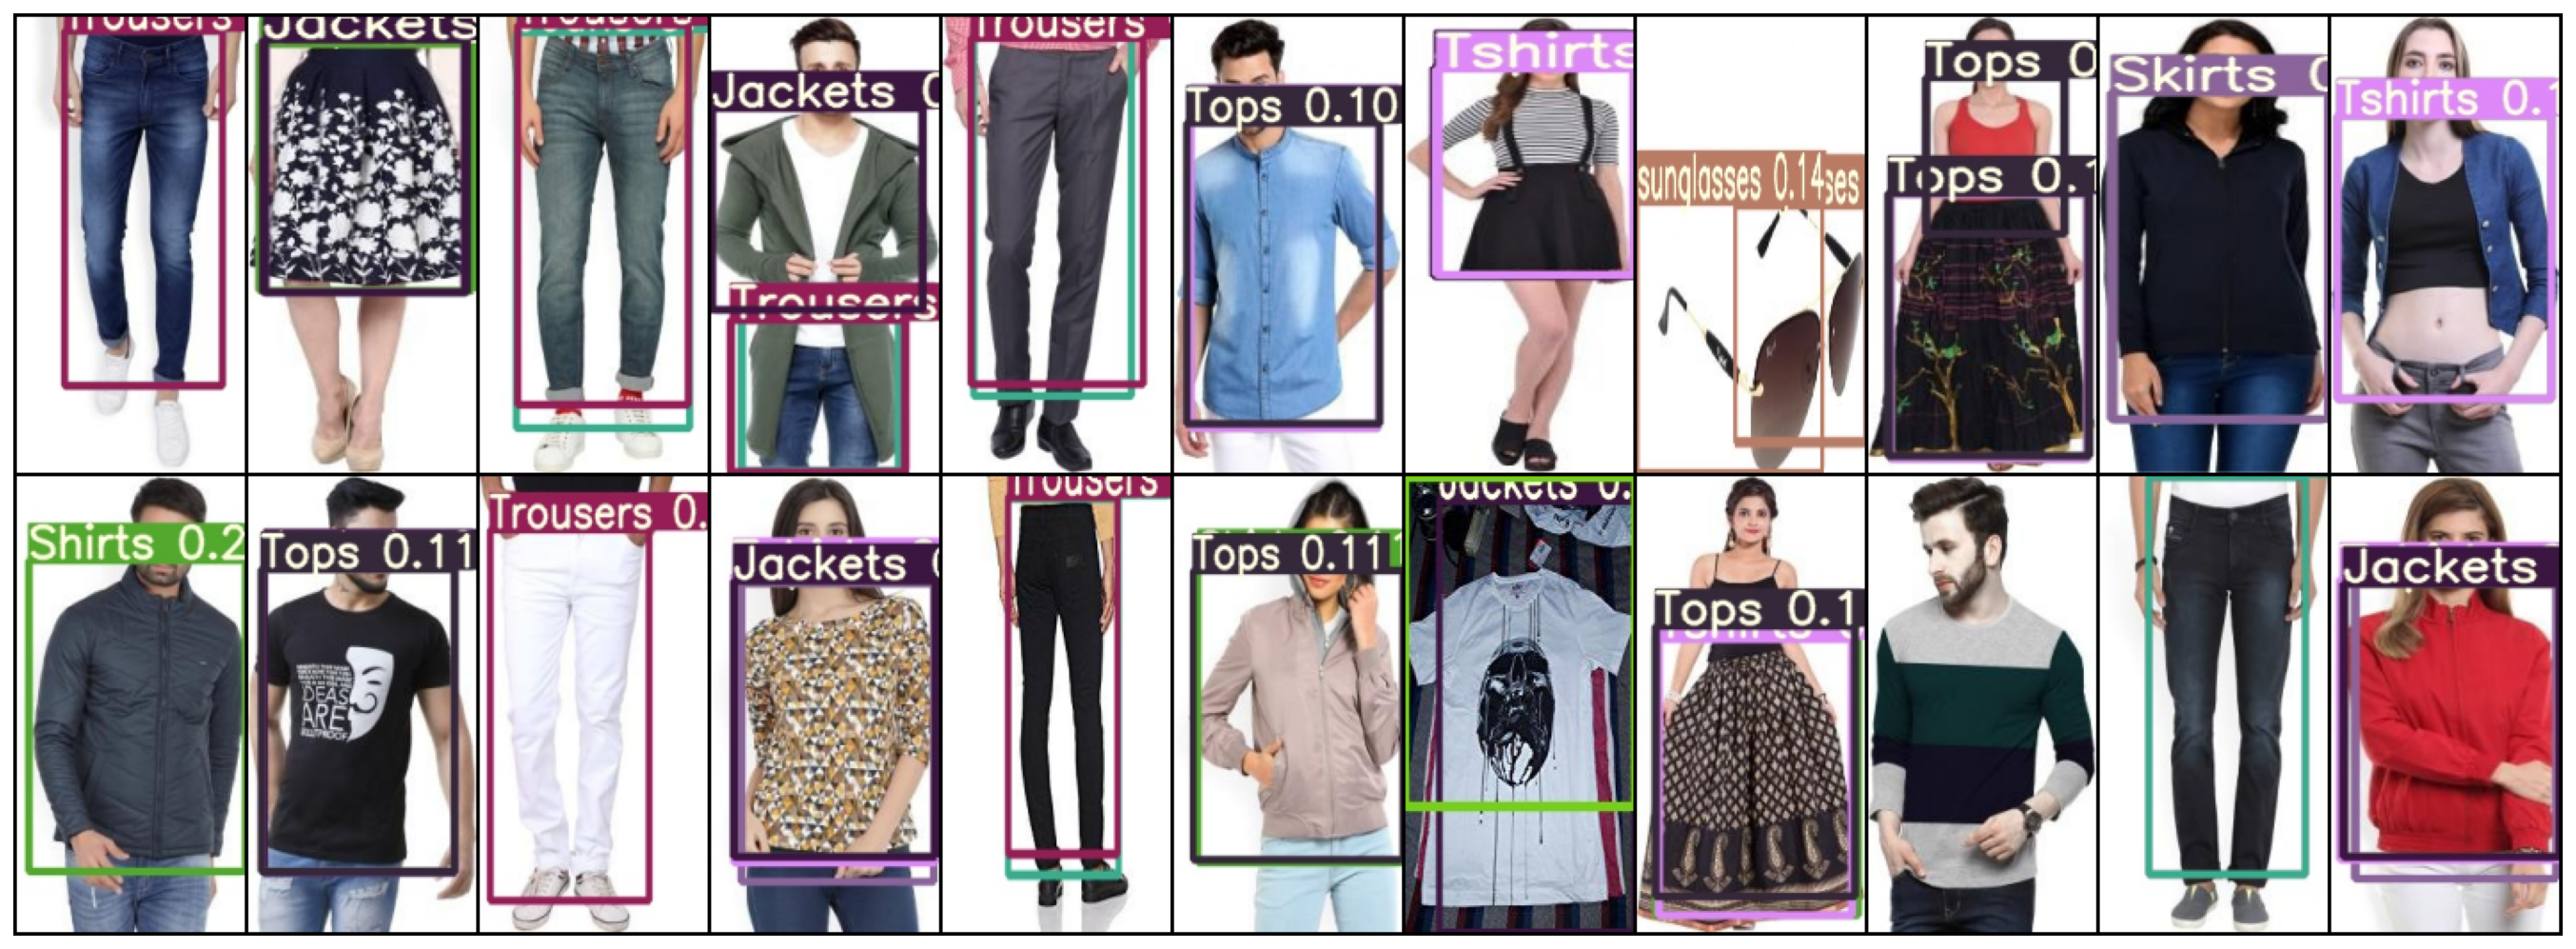

In [ ]:
img_paths = list(Path("inference/output").glob("*.jpeg"))[:22]
show_grid(img_paths)